In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

 #x_train: Images used for training the model (60,000 samples).
 #y_train: Labels corresponding to the training images.
 #x_test: Images used for testing the model (10,000 samples).
 #y_test: Labels corresponding to the test images.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


60000
10000
(60000, 28, 28)
(10000, 28, 28)


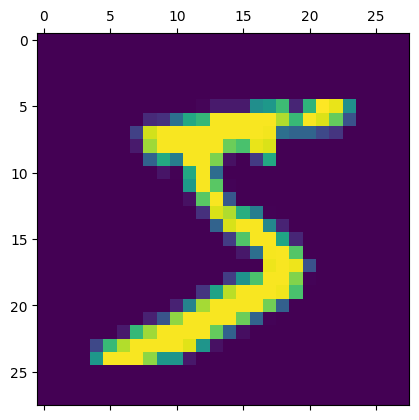

In [12]:
# Size of training and testing datasets
print(len(x_train))  
print(len(x_test))

# Shape of the datasets
print(x_train.shape)  
print(x_test.shape)

# Display a sample image from the training data
plt.matshow(x_train[0])

 #x_train[0]: Shows the pixel values of the first training image.
 #plt.matshow: Displays the first image visually.


In [13]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input image
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

In [18]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7318 - loss: 1.0381 - val_accuracy: 0.9145 - val_loss: 0.3235
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8999 - loss: 0.3670 - val_accuracy: 0.9252 - val_loss: 0.2643
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9112 - loss: 0.3106 - val_accuracy: 0.9375 - val_loss: 0.2303
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9238 - loss: 0.2753 - val_accuracy: 0.9420 - val_loss: 0.2106
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9302 - loss: 0.2463 - val_accuracy: 0.9473 - val_loss: 0.1967


In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9274 - loss: 0.2612
Test Accuracy: 0.9377999901771545


<Axes: >

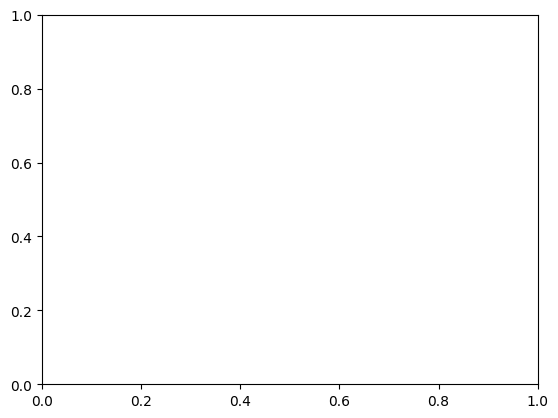

In [28]:
import seaborn as sns
sns.lineplot(model.history.history)

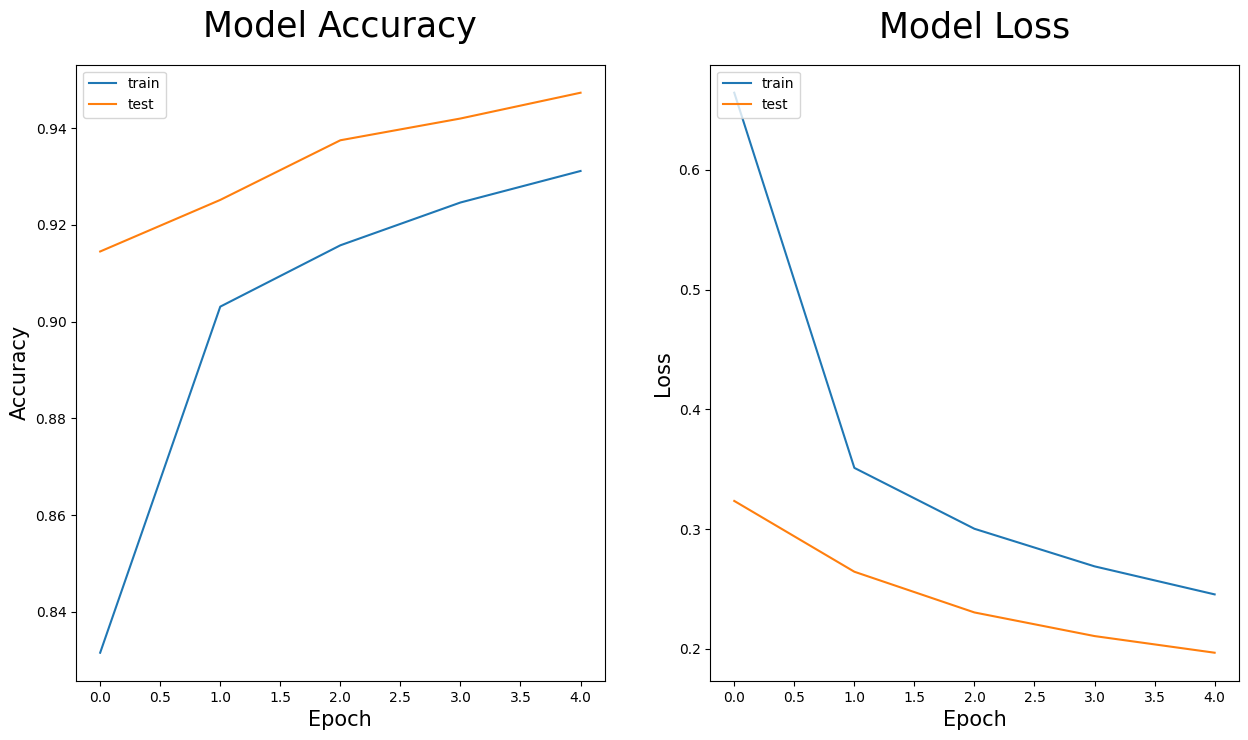

In [29]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9276 - loss: 0.2605


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


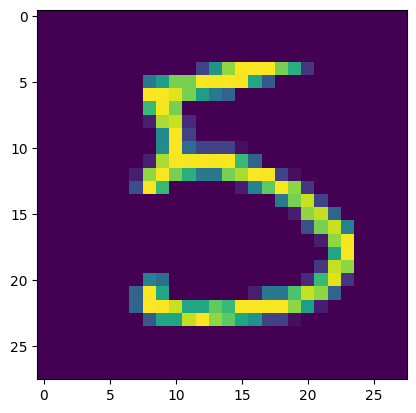

5


In [31]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))